# Sensitivity analysis to cost models
Water demands can be met by numerous sources of water. AWASH performs the allocation of water by solving an optimization problem resulting in the least costly solution to meet water demands under the environmental constraints. In this notebook, we conduct a sensitivity analysis to the choice of cost model for water. 


## Impact on optimize-surface
Surface water use estimates are generally known at facility-, municipality- or county-level (e.g. USGS). To relate these numbers to the surface water network, an optimization problem is solved to determine the withdrawals at each canals linking nodes of the network (gauges) to the counties. As water in the network may be insufficient to meet demands, the model quantifies this failure by considering a super source. 

Two models are considered here: 1. cost is uniform, 2. cost is proportional to the relative elevation of the point of source and point of use (meaning if the gauge is at a lower altitude than the county, pumping costs are proportional to the elevation difference, if it is higher, cost is null).

In [1]:
cd("../../src/");
include("nui.jl");
include("lib/readconfig.jl");
config = readconfig("../configs/standard-1year.yml")
# setting extraction cost to 0 (option 1: cost is uniform)
config["watercost-extraction"] = false;
include("optimize-surface.jl");
include("simulate.jl");
# getting volumes and costs at the county level from the simulation
sw1 = getdata(:Allocation, :swsupply);
swc1 = getdata(:WaterCost, :swcost);
supw1 = getdata(:Allocation, :supersourcesupply);

┌──────────────────────────────────────────────────┐
│    ▄▄    ▄▄      ▄▄    ▄▄       ▄▄▄▄    ▄▄    ▄▄ │
│   ████   ██      ██   ████    ▄█▀▀▀▀█   ██    ██ │
│   ████   ▀█▄ ██ ▄█▀   ████    ██▄       ██    ██ │
│  ██  ██   ██ ██ ██   ██  ██    ▀████▄   ████████ │
│  ██████   ███▀▀███   ██████        ▀██  ██    ██ │
│ ▄██  ██▄  ███  ███  ▄██  ██▄  █▄▄▄▄▄█▀  ██    ██ │
│ ▀▀    ▀▀  ▀▀▀  ▀▀▀  ▀▀    ▀▀   ▀▀▀▀▀    ▀▀    ▀▀ │
└──────────────────────────────────────────────────┘

Welcome to AWASH, the America's Water Model, version 0.7.



Loading from saved region network...


  likely near /Users/ljosset/.julia/v0.4/Graphs/src/common.jl:3
  likely near /Users/ljosset/.julia/v0.4/Graphs/src/dot.jl:80


Loading from saved water network...
Optimize a model with 68238 rows, 106088 columns and 3732956 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [1e+06, 1e+06]
  Bounds range    [0e+00, 0e+00]
  RHS range       [7e-02, 1e+14]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 18020 rows and 14465 columns
Presolve time: 4.98s
Presolved: 50218 rows, 91984 columns, 2298775 nonzeros

Ordering time: 0.78s

Barrier statistics:
 Free vars  : 361
 AA' NZ     : 1.489e+06
 Factor NZ  : 2.377e+06 (roughly 80 MBytes of memory)
 Factor Ops : 2.115e+08 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.32900070e+19 -1.11429078e+21  1.29e+13 3.19e+05  8.32e+15     9s
   1   5.32909767e+19 -1.49135815e+22  1.29e+13 7.76e+05  8.34e+15    10s
   2   5.32914022e+19 -9.09331704e+24  1.29e+13

Creating model...


Loading extraction cost from saved data...
Running model...


Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing canal.02248600
Missing reservoir.2684
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs.01403535
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08437600
Missing usgs.09277800
Missing canal.10170700
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02280500
Missing canal.02280500
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing ca

In [2]:
# setting extraction cost proportional to relative elevation (option 2)
config["watercost-extraction"] = true;
include("optimize-surface.jl");
include("simulate.jl");
# getting volumes and costs at the county level from the simulation
sw2 = getdata(:Allocation, :swsupply);
swc2 = getdata(:WaterCost, :swcost);
supw2 = getdata(:Allocation, :supersourcesupply);

Loading from saved region network...
Loading from saved water network...


Loading extraction cost from saved data...
Optimize a model with 68238 rows, 106088 columns and 3732956 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [1e+06, 1e+06]
  Bounds range    [0e+00, 0e+00]
  RHS range       [7e-02, 1e+14]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 18020 rows and 14465 columns (presolve time = 5s) ...
Presolve removed 18020 rows and 14465 columns
Presolve time: 5.76s
Presolved: 50218 rows, 91984 columns, 2298775 nonzeros

Ordering time: 0.83s

Barrier statistics:
 Free vars  : 361
 AA' NZ     : 1.489e+06
 Factor NZ  : 2.377e+06 (roughly 80 MBytes of memory)
 Factor Ops : 2.115e+08 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   5.32900070e+19 -1.11429078e+21  1.29e+13 3.19e+05  8.32e+15    10s
   1   5.32909767e+19 -1.49135815e+22  1.29

.510060 seconds (475.88 k allocations: 158.360 MB, 0.83% gc time)
supersourcesupply
[3158.4676981989687,847.663350800653,0.0,0.0,0.0,297.34499999999997,120.53757515873014,1989.0130311405837,3077.1750000000006,26.833980001170232,1362.2549999999999,0.0,0.0,288.0782489729022,62.94761263779526,350.1995858547709,0.0,0.0,0.0,1325.0195545908182,0.0,3449.5835561609238,0.0,0.0,1235.5202869103323,7008.43924754902,0.0,0.0,2506.500635847209,0.0,0.0,2679.340115821641,2319.3880172723248,1056.9440893041751,0.0,19780.099444607575,19571.061624795693,96.81,8906.52,0.0,11084.745,0.0,1233.2486618581283,3319.1999999999994,5398.899870589088,3316.534027404272,0.0,0.0,23347.30698796491,0.0,0.0,0.0,1412.2686704728217,0.0,354.3557527295168,0.0,0.0,0.0,0.0,0.0,0.0,7890.015,0.0,16139.780815799837,0.0,0.0,850.545,4499.766982157507,0.0,0.0,0.0,10266.266672999594,6865.769205332672,0.0,0.0,0.0,3288.8381551863004,11947.273872021164,0.0,0.0,6117.277414172129,0.0,0.0,0.0,2399.505,13643.165904568004,691.5,0.0,0.0,6182.00

Creating model...


Loading extraction cost from saved data...
Running model...


Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing canal.02248600
Missing reservoir.2684
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs.01403535
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08437600
Missing usgs.09277800
Missing canal.10170700
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02280500
Missing canal.02280500
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing ca

In [3]:
# comparison with usgs estimates - loading the data
recorded = readtable(datapath("extraction/USGS-2010.csv"));
swusgs = recorded[:, :TO_SW] * 1383. / 12 *config["timestep"] * numsteps;

In [15]:
# verifying that demands are met
swusgs.data -sum(sw1+supw1,2)

#sum(abs(swusgs-sum(sw1+supw1,2)))
#sum(abs(swusgs-sum(sw2+supw2,2)))

3109x1 Array{Float64,2}:
  6006.49       
   847.663      
     0.0        
     0.0        
     0.0        
   297.345      
   120.538      
  3309.75       
  3301.05       
    26.834      
  2724.51       
     7.27596e-12
     0.0        
     ⋮          
     2.71048e5  
     1.12569e5  
  9050.03       
     4.18345e5  
     2.0083e5   
     2.17698e5  
     2.02542e5  
 79578.5        
     0.0        
     2.6852e5   
     2.19385e5  
 34395.2        

### Comparison of the results


In [ ]:
# Supersource map - 0 extraction cost
mapdata(sum(supw1,2))
# Supersource map - with extraction cost
mapdata(sum(supw2,2))

-----------------------------------------------------------
PBS Mapping 2.69.76 -- Copyright (C) 2003-2016 Fisheries and Oceans Canada

PBS Mapping comes with ABSOLUTELY NO WARRANTY;
for details see the file COPYING.
This is free software, and you are welcome to redistribute
it under certain conditions, as outlined in the above file.

A complete user guide 'PBSmapping-UG.pdf' is located at 
/home/laureline/anaconda2/lib/R/library/PBSmapping/doc/PBSmapping-UG.pdf

Packaged on 2015-04-23
Pacific Biological Station, Nanaimo

All available PBS packages can be found at
http://code.google.com/p/pbs-software/

To see demos, type '.PBSfigs()'.
-----------------------------------------------------------


Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: foreign


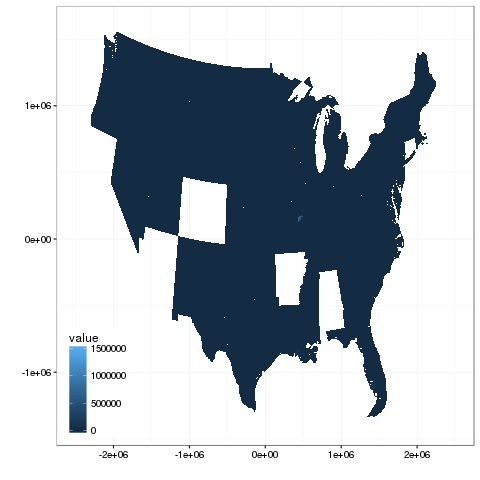

RCall.RObject{RCall.VecSxp}


In [5]:
mapdata(:Allocation, :balance, "sum")

In [4]:
include("simulate.jl");
# getting volumes and costs at the county level from the simulation
sw = getdata(:Allocation, :swsupply);
swc = getdata(:WaterCost, :swcost);
gw = getdata(:Allocation, :gwsupply);
gwc = getdata(:WaterCost, :gwcost);
supw = getdata(:Allocation, :supersourcesupply);
supwc = getdata(:WaterCost, :supersourcecost);

Loading from saved region network...
Loading from saved water network...
Loading from saved region network...


Creating model...


Loading extraction cost from saved data...


Running model...


Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing canal.02248600
Missing reservoir.2684
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs.01403535
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08437600
Missing usgs.09277800
Missing canal.10170700
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02280500
Missing canal.02280500
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing ca

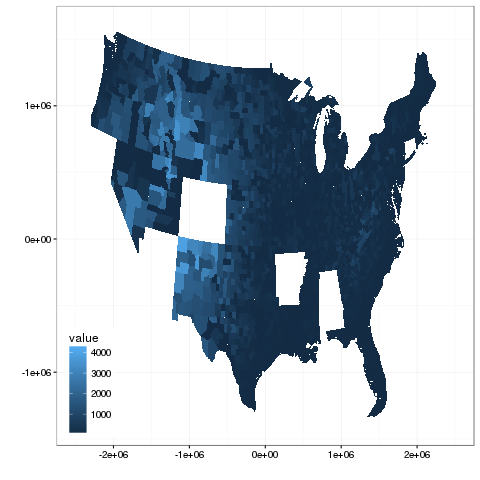

RCall.RObject{RCall.VecSxp}


In [7]:
# cost of water per 1000m3
mapdata(sum((supwc+gwc+swc)./(supw+gw+sw),2))

In [8]:
# comparison with usgs estimates - loading the data
recorded = readtable(datapath("extraction/USGS-2010.csv"));
swusgs = recorded[:, :TO_SW] * 1383. / 12 *config["timestep"] * numsteps;
gwusgs = recorded[:, :TO_GW] * 1383. / 12 *config["timestep"] * numsteps;
ugwc=getdata(:WaterCost, :unitgwextractioncost)[:,2]+getdata(:WaterCost, :unitgwtreatmentcost)[:,2] + getdata(:WaterCost, :unitdistributioncost)[:,2];
gwusgsc = gwusgs .* ugwc;

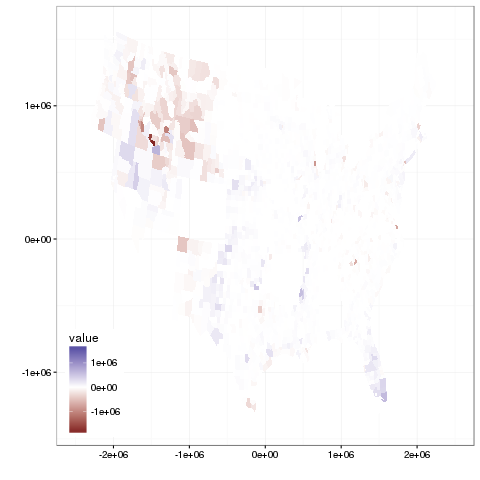

RCall.RObject{RCall.VecSxp}


In [9]:
# mapping difference in volume per source type
mapdata(sum(sw,2).-swusgs, nothing, nothing, true)

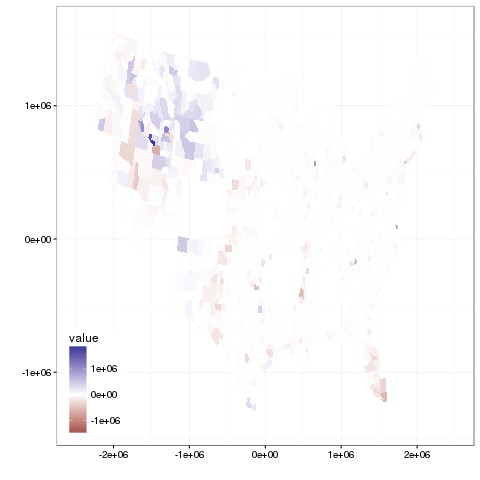

RCall.RObject{RCall.VecSxp}


In [10]:
mapdata(sum(gw,2).-gwusgs, nothing, nothing, true)